# 로지스틱 회귀분석

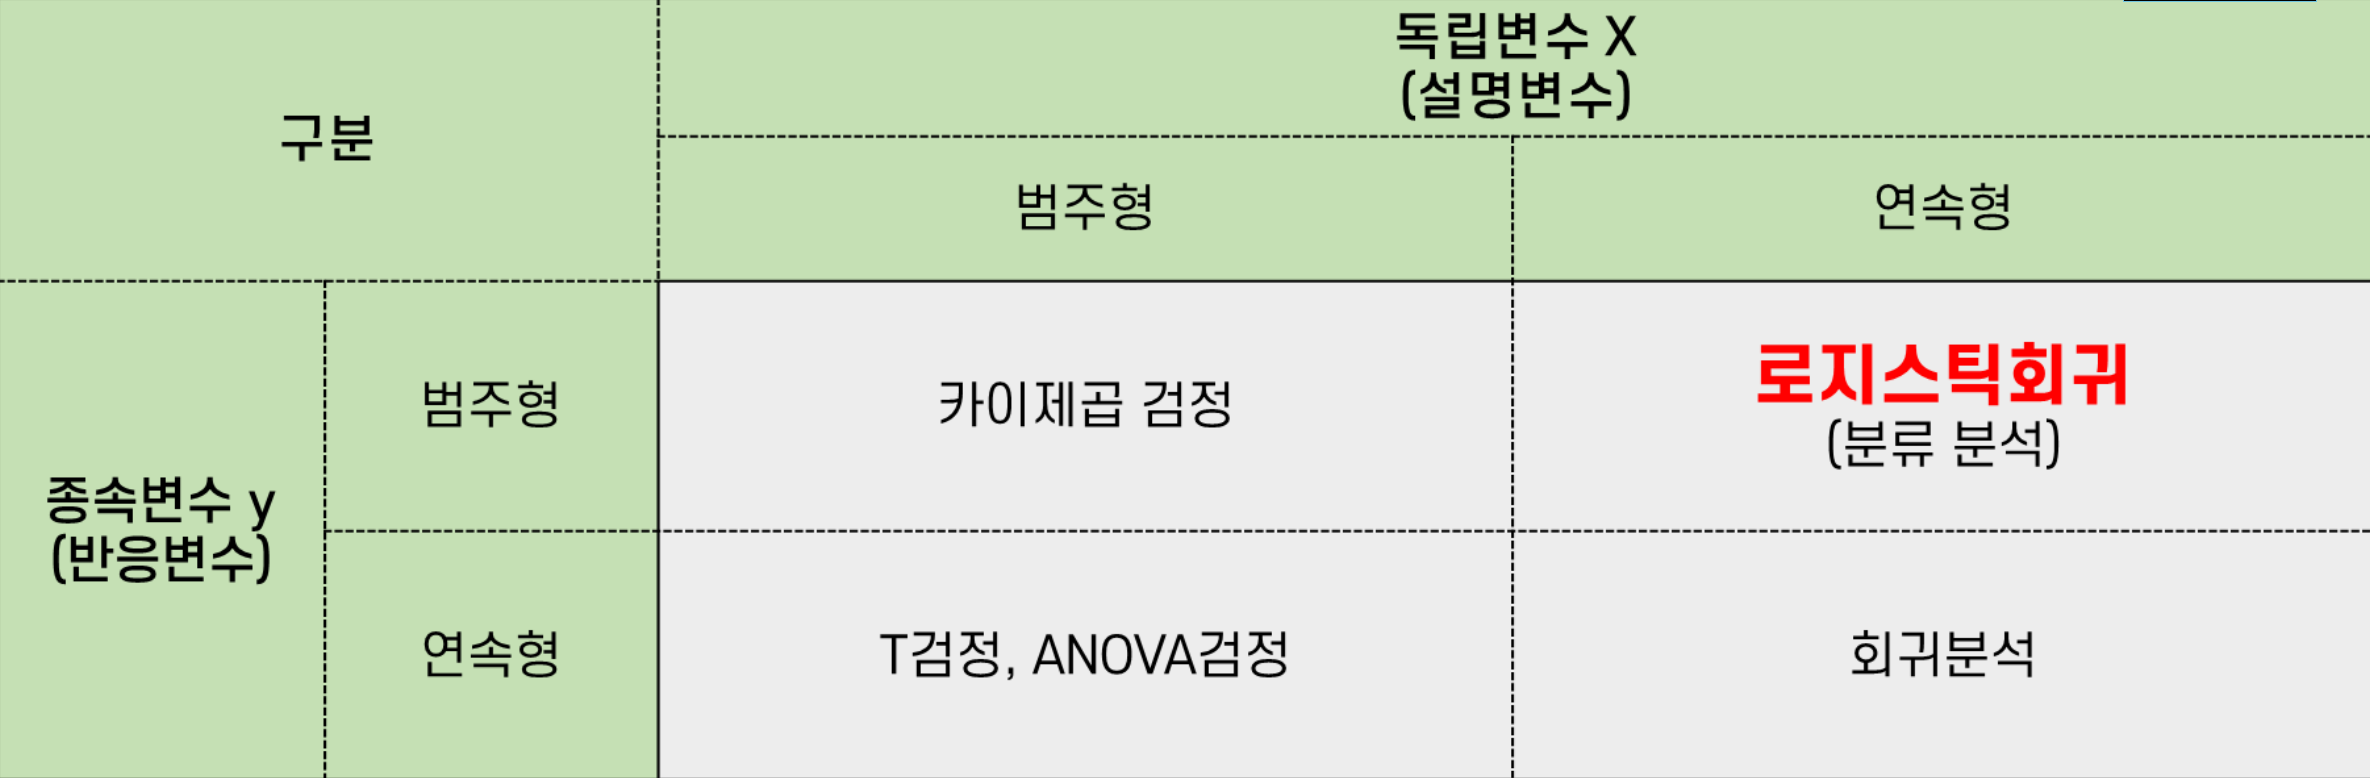

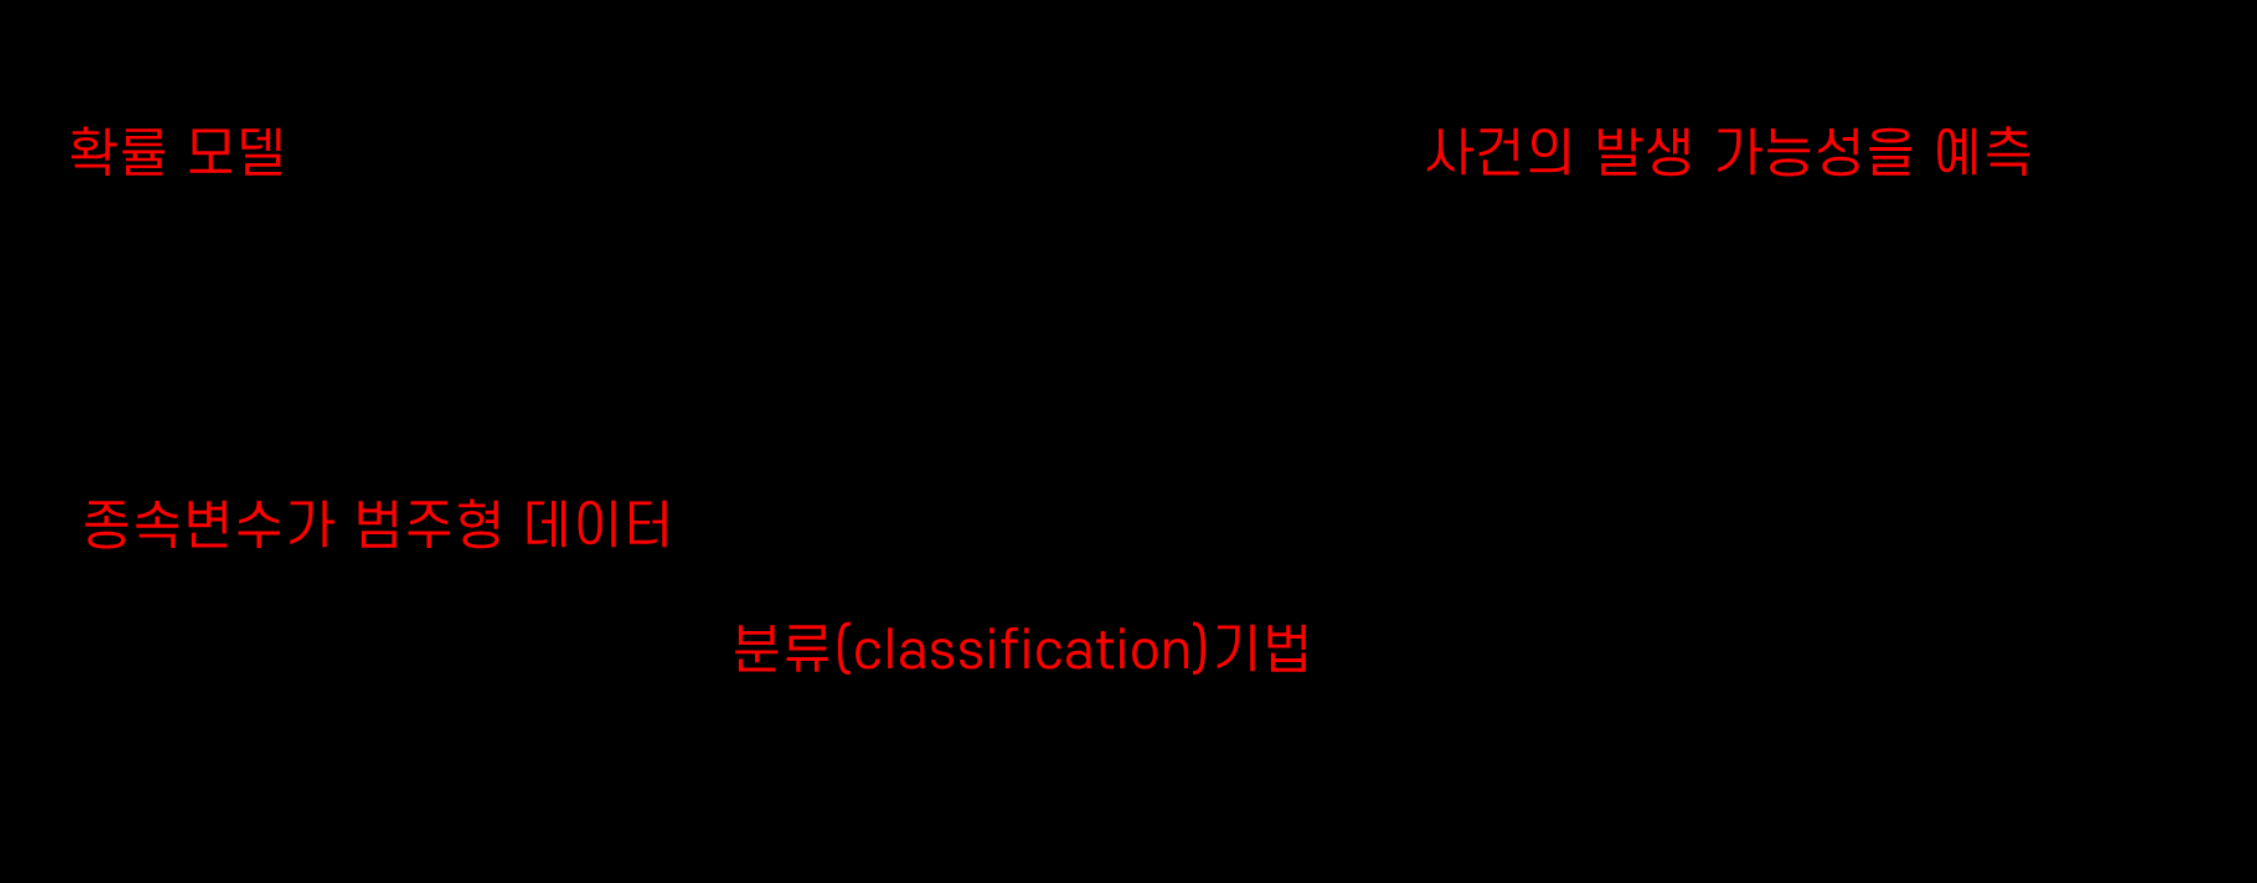

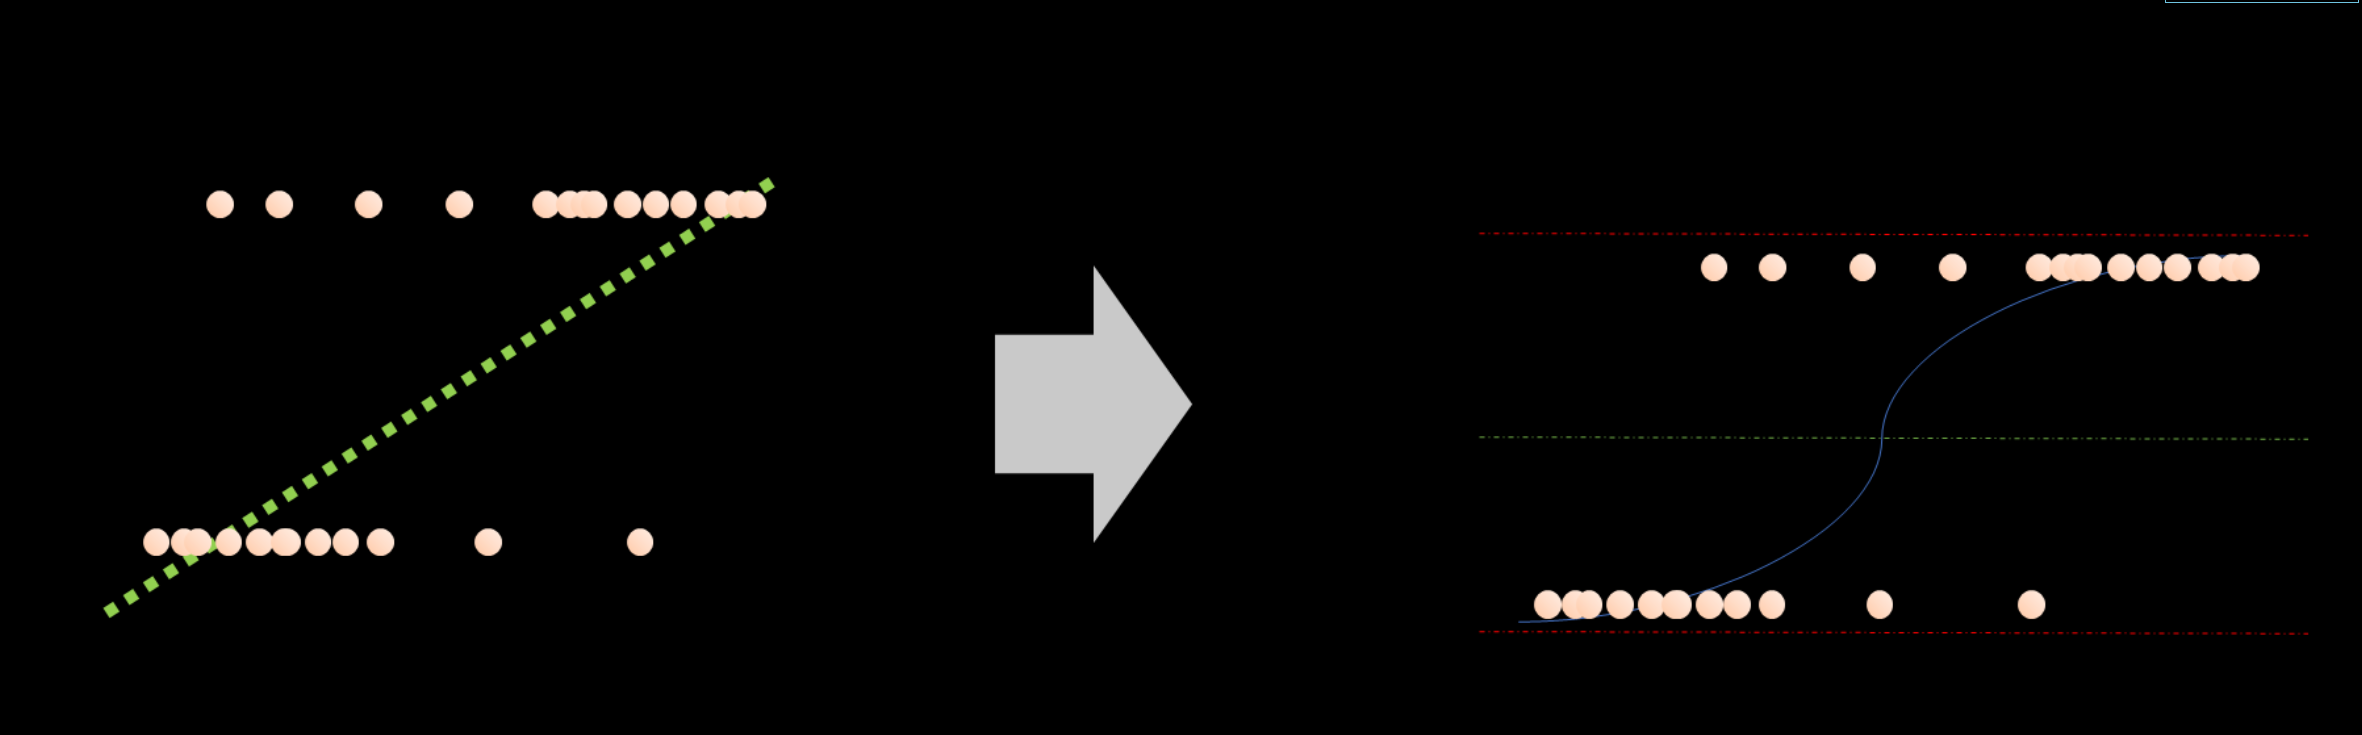

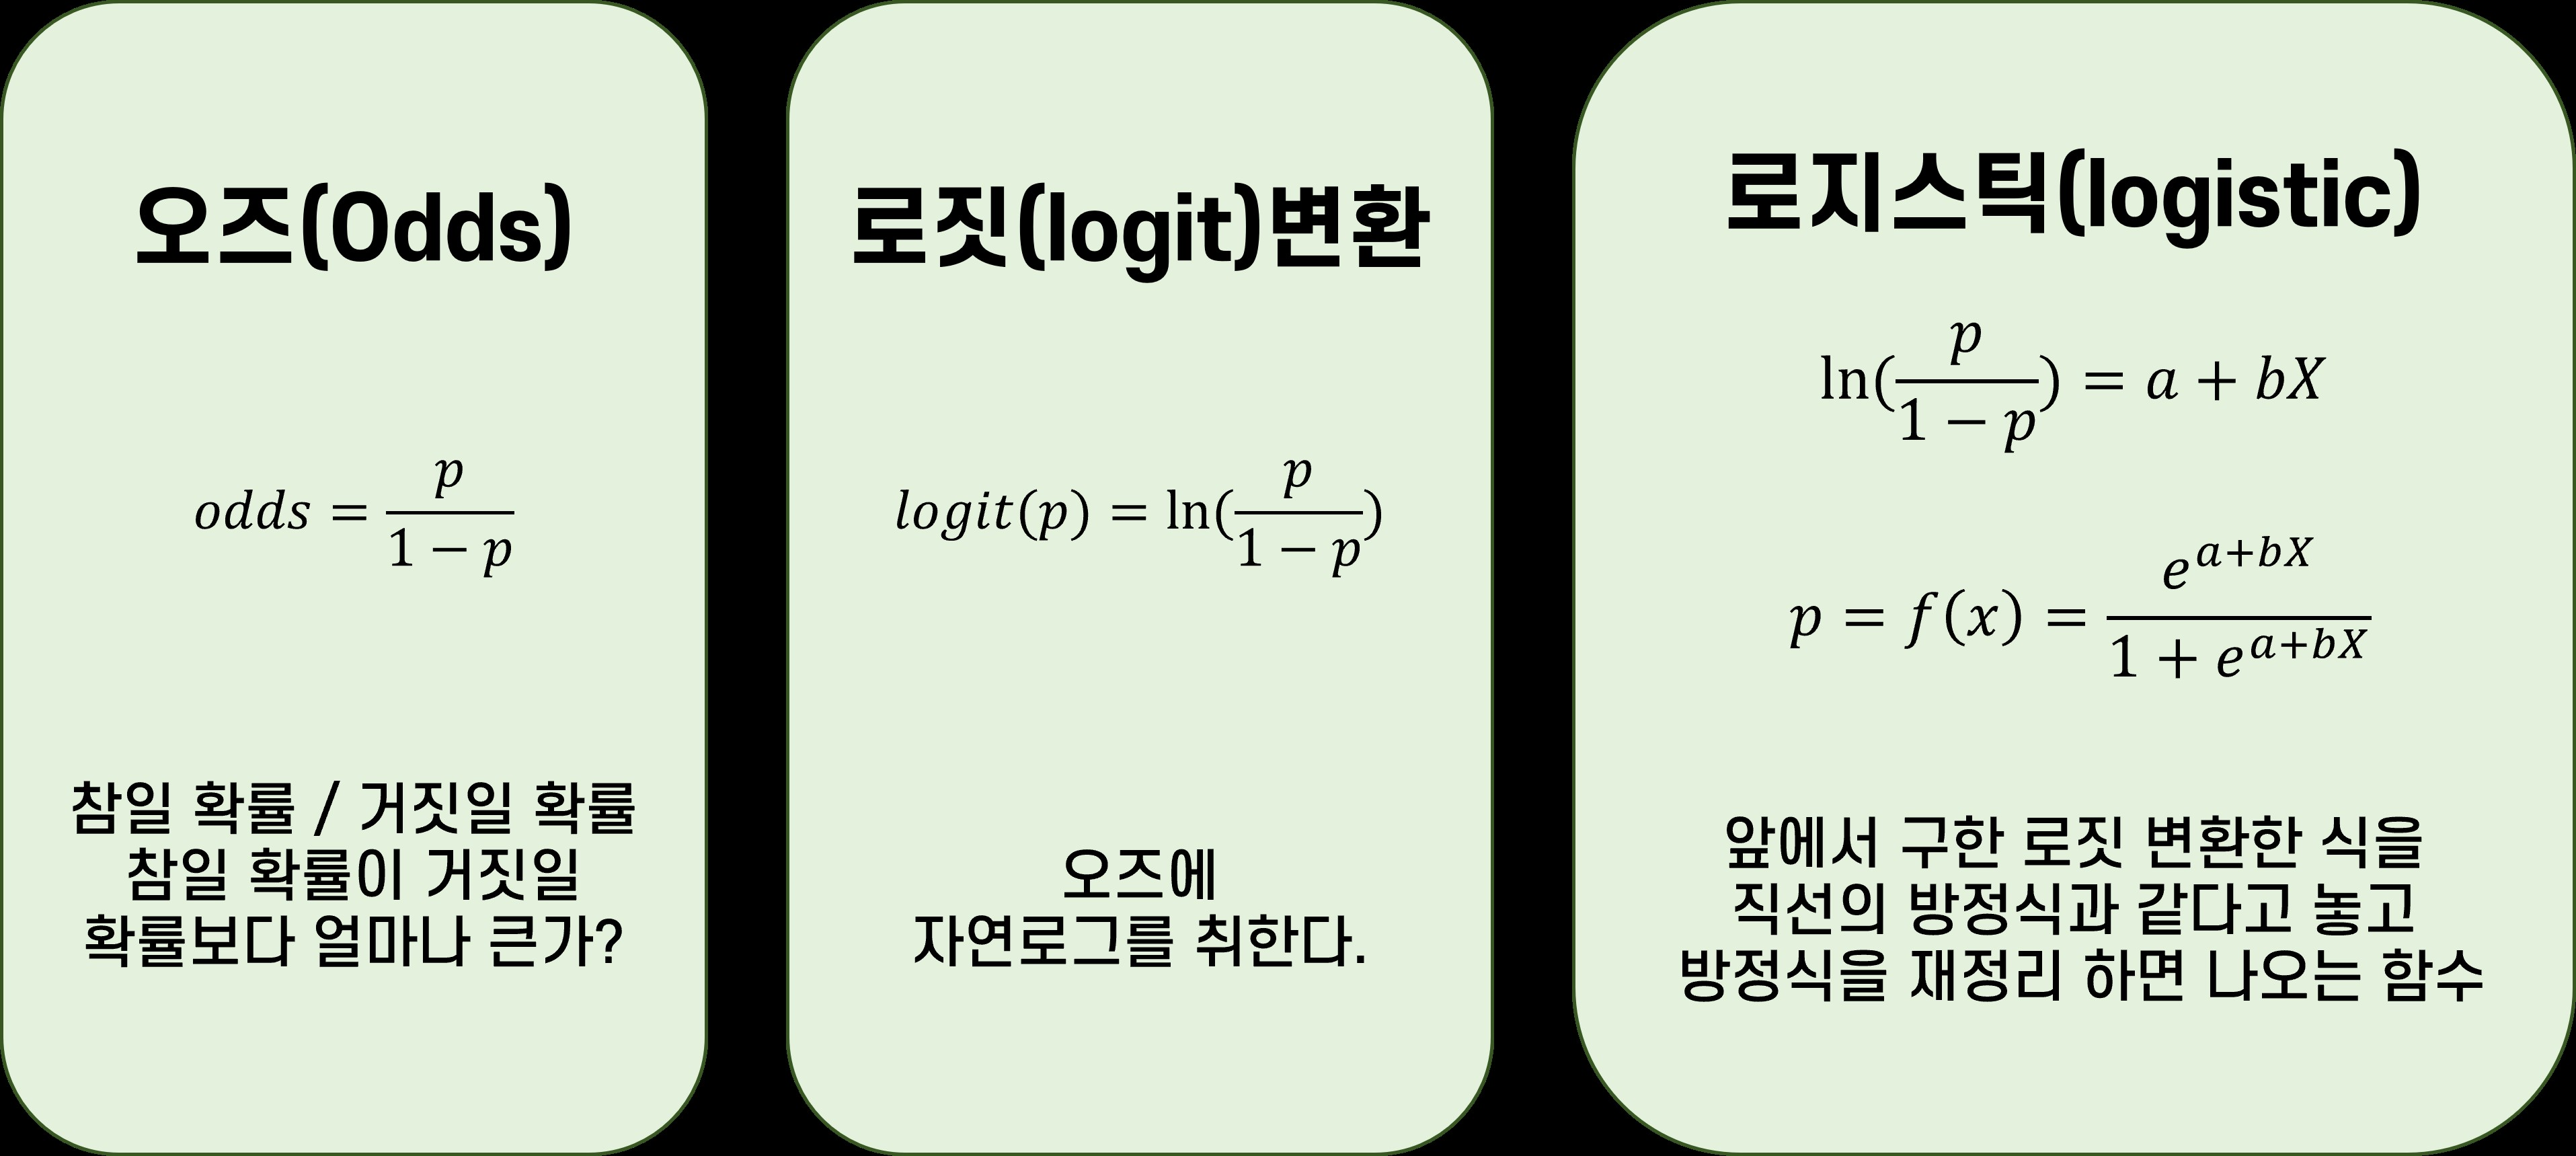

__[예제 1-1]__   
titanic 데이터를 분할하고, train 데이터로 로지스틱 회귀모델을 만들어보자

In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df_t = pd.read_csv('./data/titanic.csv')
df_t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton


In [2]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [3]:
## 전처리
# 결측치 제거
df_t['age'] = df_t['age'].fillna(df_t['age'].median())

In [4]:
# 최빈값 찾기
df_t['embark_town'].value_counts().index[0]

'Southampton'

In [5]:
# 최빈값으로 결측치 채우기 
df_t['embark_town'] = df_t['embark_town'].fillna(df_t['embark_town'].value_counts().index[0])

In [6]:
# 더미변수화 및 중복 칼럼 제거하기
df_t = df_t.drop(['pclass', 'embarked'], axis=1)

df_t = pd.get_dummies(df_t, columns=['sex', 'class', 'embark_town'])

In [7]:
df_t

,survived,age,sibsp,parch,fare,adult_male,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,True,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,False,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,False,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,False,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,True,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,True,0,1,0,1,0,0,0,1
887,1,19.0,0,0,30.0000,False,1,0,1,0,0,0,0,1
888,0,28.0,1,2,23.4500,False,1,0,0,0,1,0,0,1
889,1,26.0,0,0,30.0000,True,0,1,1,0,0,1,0,0


In [8]:
## import statsmodels.api as sm 특성 상
df_t = df_t.astype(float)
df_t

,survived,age,sibsp,parch,fare,adult_male,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,26.0,0.0,0.0,7.9250,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,27.0,0.0,0.0,13.0000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
887,1.0,19.0,0.0,0.0,30.0000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
888,0.0,28.0,1.0,2.0,23.4500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [9]:
# 설명변수 종속변수 분리
X = df_t.drop(['survived'], axis = 1)
y = df_t['survived']

In [12]:
## 홀드아웃 기법
# 층화추출 기법 사용(stratify)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 2020)

In [14]:
# 로지스틱회귀모형 모델링
import statsmodels.api as sm
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.409459
         Iterations 6


In [16]:
help(sm.Logit)

Help on class Logit in module statsmodels.discrete.discrete_model:

class Logit(BinaryModel)
 |  Logit(endog, exog, check_rank=True, **kwargs)
 |  
 |  Logit Model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  check_rank : bool
 |      Check exog rank to determine model degrees of freedom. Default is
 |      True. Setting to False reduces model initialization time when
 |      exog.shape[1] is large.
 |  
 |  
 | 

In [15]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      701
Method:                           MLE   Df Model:                           10
Date:                Wed, 31 May 2023   Pseudo R-squ.:                  0.3849
Time:                        09:12:40   Log-Likelihood:                -291.53
converged:                       True   LL-Null:                       -473.99
Covariance Type:            nonrobust   LLR p-value:                 2.720e-72
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                        -0.0184      0.009     -1.960      0.050      -0.037   -3.62e-06
sibsp                      -0.5172      0.133     -3.875      0.000      -0.779      -0.256


In [17]:
# 성능 척도 AIC
print(f'model AIC: {result.aic:.5f}')

model AIC: 605.06963


__[예제 1-2]__     
회귀계수의 p-value가 유의수준 0.05보다 높게 나타나는 변수가 많으므로,    
단계적 선택법을 이용하여 로지스틱 회귀분석을 다시 실시하자

In [32]:
import time
import itertools
def processSubset(X,y, feature_set) : 
    model = sm.Logit(y, X[list(feature_set)])  # 모델링
    regr = model.fit()  # 모델 학습
    AIC = regr.aic  # 모델의 AIC
    return {'model':regr, 'AIC':AIC}

'''
전진선택법
'''
def forward(X, y, predictors) : 
    # 데이터 변수들이 미리 정의된 predictors에 있는지 확인하고 분류하기
    remaining_predictors = [p for p in X.columns if p not in predictors]
    results = []
    for p in remaining_predictors : 
        results.append(processSubset(X=X, y=y, feature_set = predictors + [p]))
        
    # 데이터프레임으로 변환 
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]  # index
    
    print('Processed', models.shape[0], 'models on', len(predictors)+1, 'predictors in')
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model[0])
    return best_model

'''
후진소거법
'''
def backward(X,y, predictors) : 
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리 정의된 predictors의 조합인지 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1) : 
        results.append(processSubset(X=X, y=y, feature_set = list(combo)))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print('Processed', models.shape[0], len(predictors) - 1, 'predictors in', 
         (toc - tic))
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model[0])
    return best_model

'''
단계적 선택법
'''
def Stepwise_model(X,y) :
    Stepmodels = pd.DataFrame(columns=['AIC', 'model'])
    tic = time.time()
    predictors = [X.columns[0]]
    Smodel_before = processSubset(X,y, predictors)['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns) + 1) : 
        Forward_result = forward(X=X, y=y, predictors=predictors)  # constant added
        print(forward)
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors]
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC'] < Forward_result['AIC'] : 
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors]
            print(backward)
        if Stepmodels.loc[i]['AIC'] > Smodel_before : 
            break
        else : 
            Smodel_before = Stepmodels.loc[i]['AIC']
    toc = time.time()
    print('Total elapsed time:', (toc - tic), 'seconds')
    return(Stepmodels['model'][len(Stepmodels['model'])])

In [33]:
Stepwise_best_model = Stepwise_model(X_train, y_train)

Optimization terminated successfully.
         Current function value: 0.664126
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.661913
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.662992
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.621623
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.502203
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529373
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.530107
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613957
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.658206
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.611853
  

Optimization terminated successfully.
         Current function value: 0.414592
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.412382
         Iterations 6
Processed 6 models on 8 predictors in
Selected predictors: ['adult_male', 'class_First', 'class_Second', 'sibsp', 'class_Third', 'age', 'parch', 'fare'] AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x000002D40B587F70>
<function forward at 0x000002D409CEA280>
Optimization terminated successfully.
         Current function value: 0.414596
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.416159
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.415297
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.427744
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.427787
         Iterations 6

In [34]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Wed, 31 May 2023   Pseudo R-squ.:                  0.3849
Time:                        09:44:12   Log-Likelihood:                -291.57
converged:                       True   LL-Null:                       -473.99
Covariance Type:            nonrobust   LLR p-value:                 6.159e-74
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
adult_male               -3.3122      0.256    -12.929      0.000      -3.814      -2.810
class_First               3.1538      0.501      6.296      0.000       2.172       4.136
class_Second              2.4695      0.391      6.324      0.000       1.704       3.235
sibsp                    -0.5143      0.124     -4.136      0.000      -0.758      -0.271
class_Third               1.3493      0.326      4.134      0.000       0.710       1.989
age                      -0.0186      0.009     -2.090      0.037      -0.036      -0.001
parch                    -0.3526      0.144     -2.451      0.014      -0.635      -0.071
fare                      0.0049      0.003      1.615      0.106      -0.001       0.011
embark_town_Cherbourg     0.4644      0.280      1.659      0.097      -0.084       1.013
=========================================================================================
"""

In [36]:
# 로지스틱 회귀모델로 적합한 회귀계수 확인

## 단계적 선택법
print(Stepwise_best_model.params)

adult_male              -3.312166
class_First              3.153808
class_Second             2.469512
sibsp                   -0.514293
class_Third              1.349336
age                     -0.018594
parch                   -0.352575
fare                     0.004931
embark_town_Cherbourg    0.464423
dtype: float64


In [37]:
# 적합한 회귀계수로 오즈비 확인

# adult_male 일때,  adult_male이 아닌 사람에 비해 생존확률이 99 % 감소한다 
# class_First일때, class_Second일 때보다 생존확률은 약 2배 증가 , class_Third일 때보다 약 6배 증가 
# sibsp가 1단위 증가할 때 생존확률 40% 감소 
# fare가 1단위 증가할 때, 생존확률 0.004% 증가 
np.exp(Stepwise_best_model.params)

adult_male                0.036437
class_First              23.425090
class_Second             11.816675
sibsp                     0.597923
class_Third               3.854864
age                       0.981578
parch                     0.702876
fare                      1.004943
embark_town_Cherbourg     1.591095
dtype: float64

## 로지스틱 회귀분석 : 분류분석으로 활용하기

In [38]:
Stepwise_best_model.params.index

Index(['adult_male', 'class_First', 'class_Second', 'sibsp', 'class_Third',
       'age', 'parch', 'fare', 'embark_town_Cherbourg'],
      dtype='object')

In [39]:
X_test = X_test[Stepwise_best_model.params.index]

In [40]:
y_test

560    0.0
130    0.0
551    0.0
587    1.0
2      1.0
      ... 
818    0.0
113    0.0
605    0.0
642    0.0
206    0.0
Name: survived, Length: 179, dtype: float64

In [41]:
# 예측하기
y_pred = Stepwise_best_model.predict(X_test)
y_pred

560    0.079787
130    0.111742
551    0.228554
587    0.216542
2      0.711970
         ...   
818    0.061194
113    0.625184
605    0.044369
642    0.310386
206    0.047699
Length: 179, dtype: float64

In [42]:
# 임계값을 설정해서 예측값을 이진분류로 반환하기

def cut_off(y, threshold) : 
    Y = y.copy()
    Y[Y>threshold] = 1
    Y[Y<=threshold] = 0
    return(Y.astype(int))

y_pred = cut_off(y_pred, 0.5)  # 임계값을 0.5로 설정
y_pred

560    0
130    0
551    0
587    0
2      1
      ..
818    0
113    1
605    0
642    0
206    0
Length: 179, dtype: int32

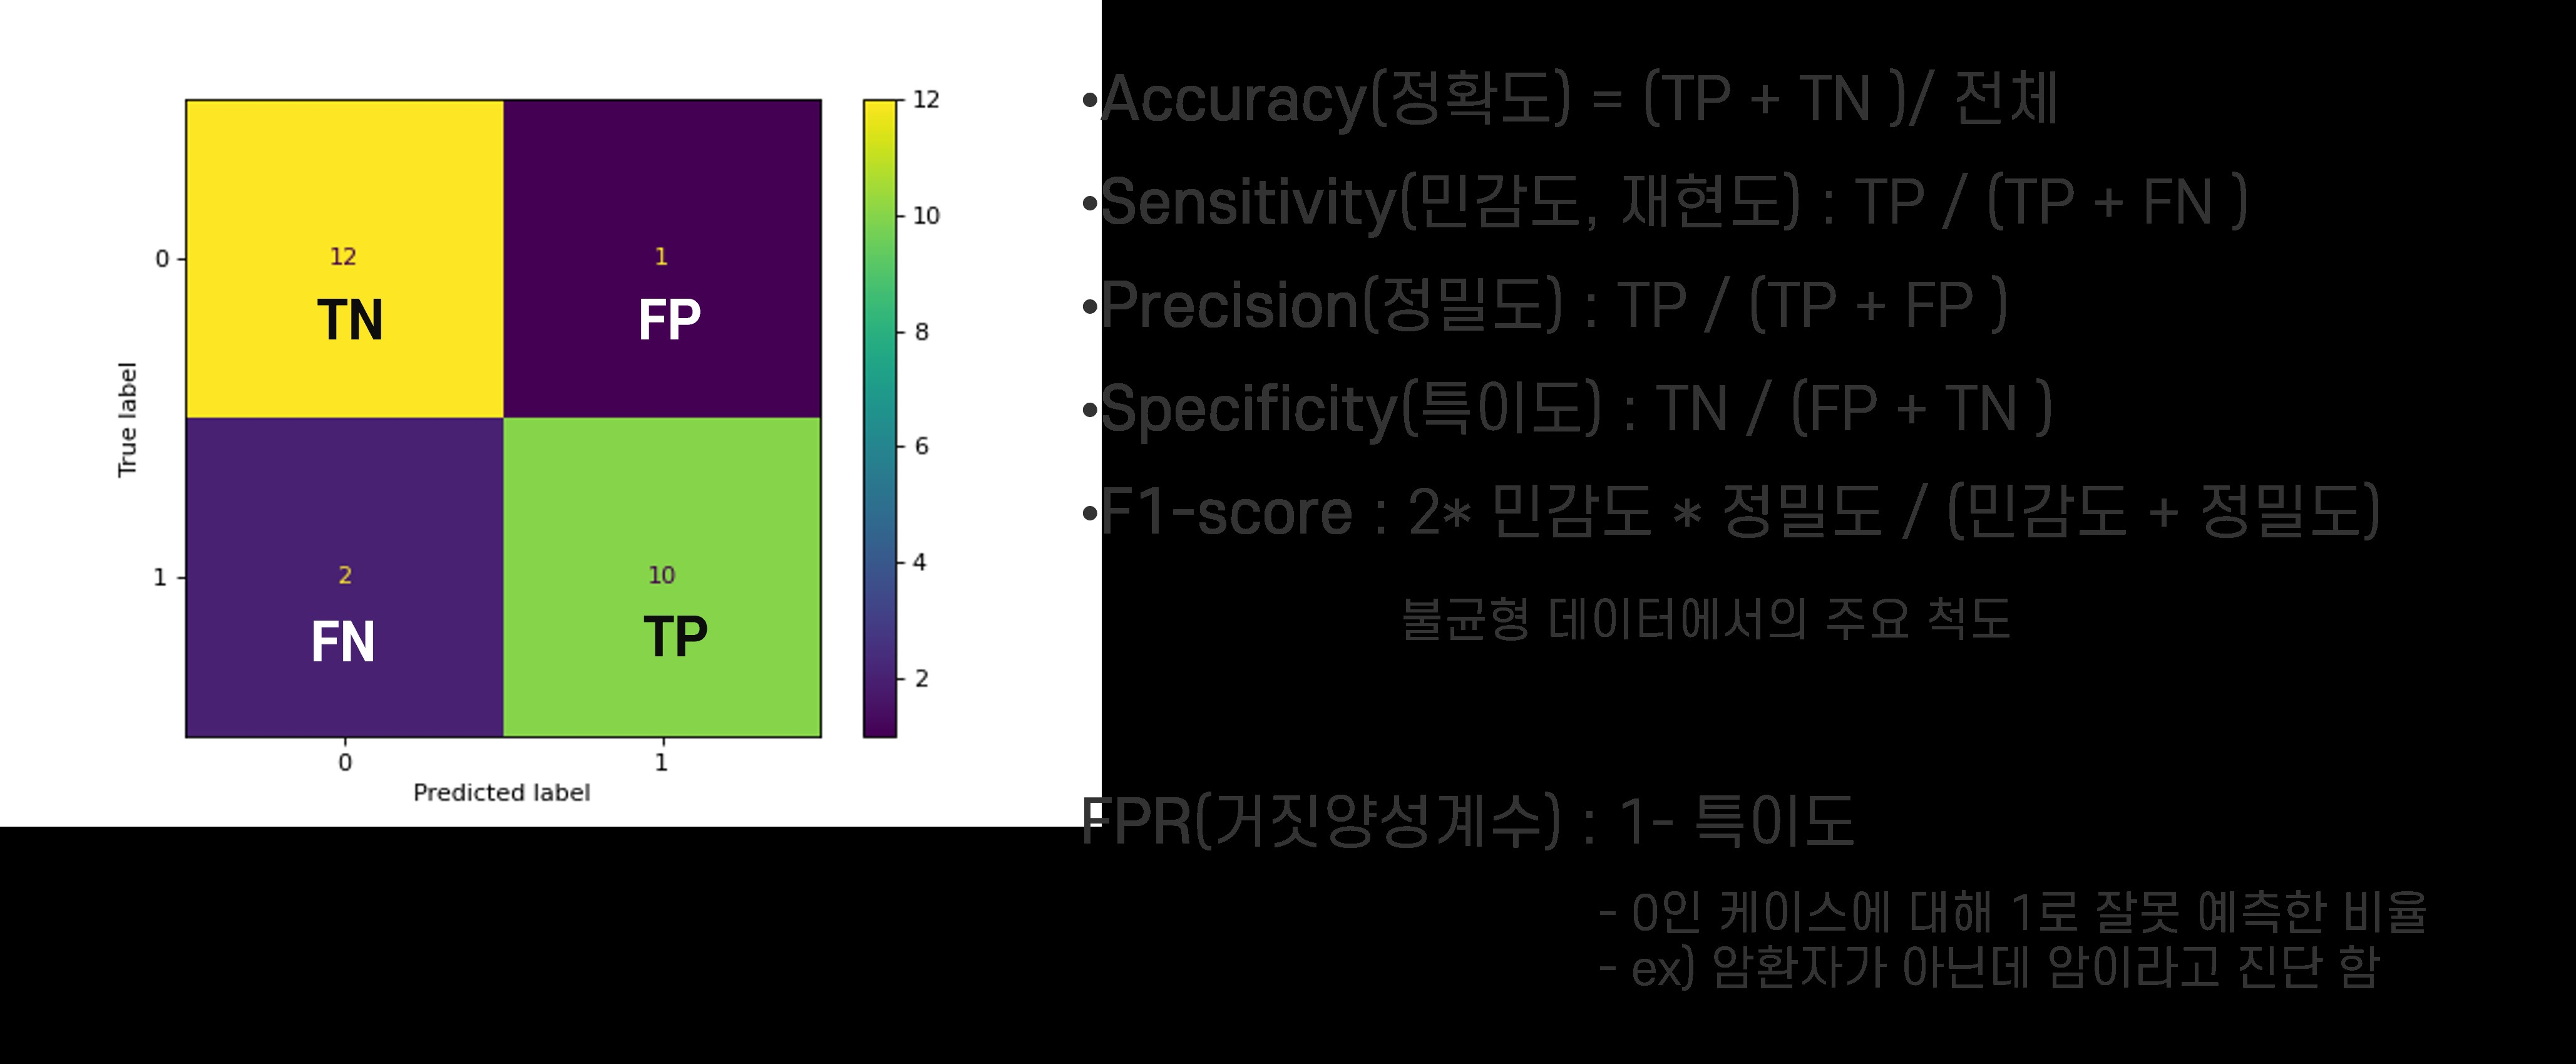

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [48]:
# 혼동행렬
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[92 18]
 [21 48]]


In [49]:
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('Sensivitivity : ', recall_score(y_test, y_pred))
print('precision_score : ', precision_score(y_test, y_pred))
print('f1_score : ', f1_score(y_test, y_pred))

Accuracy :  0.7821229050279329
Sensivitivity :  0.6956521739130435
precision_score :  0.7272727272727273
f1_score :  0.711111111111111


## 분류분석 평가지표 

### ROC 곡선
- x축은 FPR(1-특이도), y축은 재현율을 가지는 그래프
- TPR(민감도)은 1 이고, FPR(1-특이도)는 0인 경우 가장 이상적  
- 거짓 양성 비율(False Positive Rate;FPR) 의미
  
|이름|의미|
|---|---|
|민감도(재현율)|실제 True일 때 True라고 예측하는 비율|
|특이도|실제 False일 때 False라고 예측하는 비율|
|FPR| FP/TN+FP는 실제로는 음성인 것과 양성으로 잘못 예측한 것의 비율

### AUC
- ROC 곡선의 아래 면적을 계산한 것으로 값이 클수록 모델의 성능이 좋다고 판단 가능

<br>

roc_auc_score
- binary 분류일 때 : roc_auc_score(Y, clf.predict_proba(X)[:, 1])
- 다중 클래스 분류일 때 : roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')
- 여러 개의 라벨을 분류할 때 : roc_auc_score(y, y_pred, average=None)

__[예제 1-3]__    
ROC 커브 그리기 및 ROC_AUC 산출하기

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline
# ROC 커브 시각화

def draw_roc(test_y, pred_y, model_name) : 
    fpr, tpr, thr = roc_curve(test_y, pred_y)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color = 'darkorange', lw=lw, label = 'ROC curve {area = %0.2f}' % roc_auc)
    plt.plot([0,1], [0,1], color = 'navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic {model_name}')
    plt.legend(loc='lower right')
    plt.ion()
    plt.tight_layout()
    plt.show()

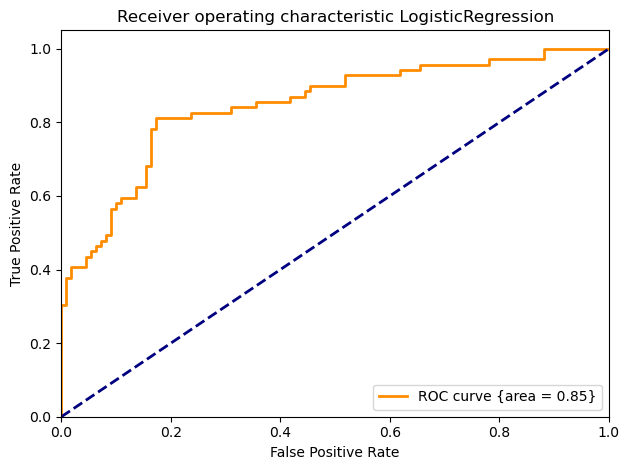

In [66]:
draw_roc(y_test, y_pred, 'LogisticRegression')

In [67]:
from sklearn.metrics import roc_auc_score
# y_pred는 확률값이어야 함
roc_auc_score(y_test, y_pred)

0.8469038208168642

In [64]:
# 예측하기
y_pred = Stepwise_best_model.predict(X_test)
y_pred

560    0.079787
130    0.111742
551    0.228554
587    0.216542
2      0.711970
         ...   
818    0.061194
113    0.625184
605    0.044369
642    0.310386
206    0.047699
Length: 179, dtype: float64